# MXR distorsion + pedal - circuit analysis

Reference : https://www.electrosmash.com/mxr-distortion-plus-analysis

## Amplification stage

## Input filtering

### Frequency response analysis

$$R1 = 10KΩ$$
$$R2 = 1000KΩ$$
$$C1 = 1nF$$
$$C2 = 10nF$$

Development:

$$V_{+} = V_{in} * \frac{R2}{Z_{C2} + R1 + R2} + \frac{V_{cc}}{2}$$
$$= V_{in} * \frac{R2}{1 + R2} * \frac{1}{1 + \frac{Z_{C2}}{R1 + R2}} + \frac{V_{cc}}{2}$$
$$=  V_{in} * \frac{R2}{1 + R2} * \frac{(R1 + R2)C2*S}{1 + (R1 + R2)C2*S} + \frac{V_{cc}}{2}$$

Final result:
$$V_{+} =  V_{in} * A * \frac{\frac{S}{\omega}}{1 + \frac{S}{\omega}} + \frac{V_{cc}}{2}$$

With:

$$A = \frac{R2}{1 + R2} = 0.99$$
$$f = \frac{\omega}{2 \pi} = \frac{1}{2 \pi (R1 +R2) C2} = 15.76Hz$$

A :  0.9900990099009901
w :  99.00990099009901 rad/s
f :  15.7579151576134 Hz

  0.0101 s
------------
0.0101 s + 1



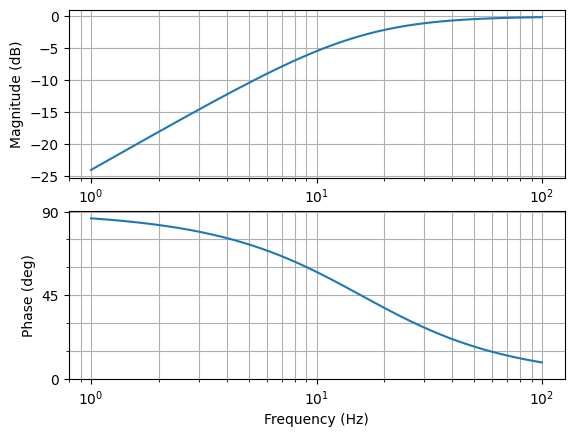

In [34]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Inputs
C1 = 1e-9
C2 = 10e-9
C3 = 47e-9
R1 = 10e3
R2 = 1e6
R3 = 4.7e3
R4 = 1e6
RV = 1e6

# Compute transfer function parameters
A = R2 / (R1 + R2)
w = 1. /((R1 + R2) * C2)
sys = ct.tf([1./w, 0], [1./w, 1.])

# Print transfer function parameters
print("A : ", A)
print("w : ", w, "rad/s")
print("f : ", w/(2*np.pi), "Hz")
print(sys)

# Display bode diagram
fig = plt.figure()
out = ct.bode_plot(sys, initial_phase=0.0, deg=True, dB=True, Hz=True)
plt.show()

## AOP circuit

### Frequency response analysis

$$R3 = 4.7KΩ$$
$$R4 = 1000KΩ$$
$$R_{V} = 1000KΩ$$
$$C3 = 47nF$$

Milleman theorem:

$$V_{-} = \frac{\frac{V_{out}}{R4}}{\frac{1}{R4}+\frac{1}{Z_{C3}+R3+\alpha*R_{V}}}$$

Development:

$$\frac{V_{-}}{V_{out}} = \frac{1}{1+\frac{R4}{Z_{C3}+R3+\alpha*R_{V}}} = \frac{1}{1+\frac{R4C3*S}{1+(R3+\alpha*R_{V})C3*S}}$$
$$= \frac{1 + (R3 + \alpha * R_{V})C3*S}{1 + (R3 + \alpha * R_{V})C3*S + R4C3*S}$$
$$= \frac{1 + (R3 + \alpha * R_{V})C3*S}{1 + (R3 + \alpha * R_{V} + R4)C3*S}$$

Final result :

$$\frac{V_{out}}{V_{-}} = \frac{1 + (R3 + \alpha * R_{V} + R4)C3*S}{1 + (R3 + \alpha * R_{V})C3*S} $$

With:

$$A0 = 1$$
$$A1 = \frac{1 + (R3 + \alpha R_{V} * R4}{1 + (R3 + \alpha R_{V})}$$
$$f0 = \frac{1}{2 \pi (R3 + \alpha * R_{V})C3)}$$
$$f1 = \frac{1}{2 \pi (R3 + \alpha * R_{V} + R4)C3}$$

| $$\alpha$$  | min(0)  | max(1) |
| ----------- | ------- | ------ |
| A0          | 1       | 1      |
| A1          | 213.8   | 1.995  |
| f0          | 3.37Hz  | 1.69Hz |
| f1          | 720.5Hz | 3.37Hz |

-----------------------------------------------
Transfer function With RV = 0.0
-----------------------------------------------
A :  213.72069772388852
w0 :  21.177063546014583 rad/s
f0 :  3.370434343519402 Hz
w1 :  4526.935264825714 rad/s
f1 :  720.4841244540306 Hz

 0.04722 s + 1
---------------
0.0002209 s + 1

-----------------------------------------------
Transfer function With RV = 500000.0
-----------------------------------------------
A :  2.981371148462159
w0 :  14.140091542952652 rad/s
f0 :  2.25046546483282 Hz
w1 :  42.15691647450139 rad/s
f1 :  6.709481642429053 Hz

0.07072 s + 1
-------------
0.02372 s + 1

-----------------------------------------------
Transfer function With RV = 750000.0
-----------------------------------------------
A :  2.325028057469117
w0 :  12.125489111917052 rad/s
f0 :  1.9298315295685549 Hz
w1 :  28.19212368448503 rad/s
f1 :  4.486915840643889 Hz

0.08247 s + 1
-------------
0.03547 s + 1

-----------------------------------------------
Transf

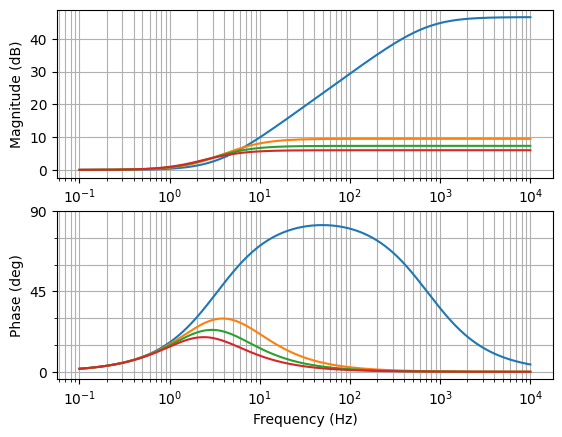

In [35]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Inputs
C1 = 1e-9
C2 = 10e-9
C3 = 47e-9
R1 = 10e3
R2 = 1e6
R3 = 4.7e3
R4 = 1e6
RV = 1e6

sys_array = []
for alpha in [0.0, 0.5, 0.75, 1.0]:

    # Compute transfer function parameters
    w0 = 1. / ((R3 + alpha*RV + R4) * C3)
    w1 = 1. /((R3 + alpha*RV) * C3)
    sys = ct.tf([1./w0, 1.], [1./w1, 1.])
    sys_array.append(sys)

    # Print transfer function parameters
    print("-----------------------------------------------")
    print("Transfer function With RV = " + str(alpha*RV))
    print("-----------------------------------------------")
    A = (1 + R3 + alpha*RV + R4) / (1 + R3 + alpha*RV)
    print("A : ", A)
    print("w0 : ", w0, "rad/s")
    print("f0 : ", w0/(2*np.pi), "Hz")
    print("w1 : ", w1, "rad/s")
    print("f1 : ", w1/(2*np.pi), "Hz")
    print(sys)

# Display bode diagram
fig = plt.figure()
out = ct.bode_plot(sys_array, initial_phase=0.0, deg=True, dB=True, Hz=True)
plt.show()

## Clipping stage

### Frequency response analysis

$$R5 = 10KΩ$$
$$R_{V} = 10KΩ$$
$$C4 = 1μF$$
$$C5 = 1nF$$


$$
  \frac{V_{1}}{V_{in}} = \frac{ R_{V}//Z_{C5}}{R_{V}//Z_{C5} + R5 + Z_{C4}}
$$

Development:

$$\frac{V_{1}}{V_{in}} = \frac{R_{V} Z_{C5}}{R_{V} Z_{C5} + (R5 + Z_{C4}) (R{V} + Z_{C5})}$$
$$= \frac{R_{V} Z_{C5}} {R_{V} Z_{C5} + R5 R{V} + R5 Z_{C5} + R{V} Z_{C4} + Z_{C4} Z_{C5}}$$
$$= \frac{R_{V}} {R_{V} + \frac{R5 R{V}}{Z_{C5}} + R5 + \frac{R{V} Z_{C4}}{Z_{C5}} + Z_{C4}}$$
$$= \frac{R_{V}} {R_{V} + R5} * \frac{1}{1 + \frac{R5 R_{V} + Z_{C4} Z_{C5} + R_{V} Z_{C4}}{Z_{C5} (R_{V} + R5)}}$$
$$= \frac{R_{V}} {R_{V} + R5} * \frac{Z_{C5} (R_{V} + R5)}{Z_{C5} (R_{V} + R5) + R5 R_{V} + Z_{C4} Z_{C5} + R_{V} Z_{C5}}$$
$$= \frac{R_{V}} {R_{V} + R5} * \frac{(R_{V} + R5)}{(R_{V} + R5) + R5 R_{V} C5*S + \frac{1}{C4*S} + \frac{R_{V}C5}{C4}}$$
$$= \frac{R_{V}} {R_{V} + R5} * \frac{(R_{V} + R5) C4 * S}{R_{V} R5 C4 C5 * S^{2} + (R_{V} C5 + R_{V} C4 + R5 C4)*S + 1}$$
$$= \frac{R_{V}} {R_{V} + R5} * \frac{(R_{V} + R5) C4 * S}{(R_{V} + R5) C4 * S + 1} * \frac{1}{\frac{R5 R_V}{R5 + R_V} * S + 1}$$


$$
  \frac{V_{out}}{V_{in}} = \alpha * \frac{R_{V}} {R_{V} + R5} * \frac{(R_{V} + R5) C4 * S}{(R_{V} + R5) C4 * S + 1} * \frac{1}{\frac{R5 R_V}{R5 + R_V} * S + 1}
$$

Final result:

$$
  \frac{V_{out}}{V_{in}} = A * \frac{\frac{S}{\omega_{1}}}{\frac{S}{\omega_{1}} + 1} * \frac{1}{\frac{S}{\omega_{0}} + 1}
$$

With:

$$A = \alpha * \frac{R_{V}} {R_{V} + R5}$$
$$f0 = \frac{\omega_{0}}{2 \pi} = \frac{1}{2 \pi \frac{R5RV}{(R5+RV)} C5} = 31.8KHz$$
$$f1 = \frac{\omega_{1}}{2 \pi} = \frac{1}{2 \pi (R5+RV) C4} = 7.96HZ$$

| $$\alpha$$  | min(0)  | max(1) |
| ----------- | ------- | ------ |
| A           | 0       | 0.5    |


### Frequency response bode diagram

In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Inputs
R5 = 10000
RV = 10000
C5 = 1e-9

In [4]:
# Compute transfer function parameter
A = RV/(R5+RV)
w0 = (R5+RV)/(R5*RV*C5)
sys = A * ct.tf([1.], [1./w0, 1.])

In [5]:
# Print transfer function parameter
print("A : ", A)
print("w0 : ", w0, "rad/s")
print("f0 : ", w0/(2*np.pi), "Hz")
print(sys)

A :  0.5
w0 :  200000.0 rad/s
f0 :  314159.2653589793 Hz

    0.5
-----------
5e-06 s + 1



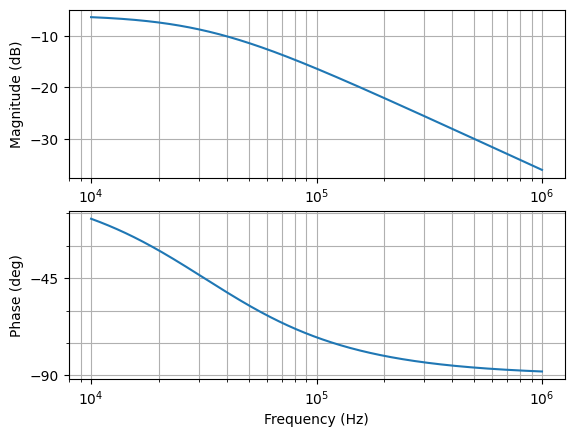

In [6]:
# Display bode diagram
fig = plt.figure()
out = ct.bode_plot(sys, deg=True, dB=True, Hz=True)
plt.show()

A :  0.5

         0.01 s
-------------------------
1e-07 s^2 + 0.02001 s + 1



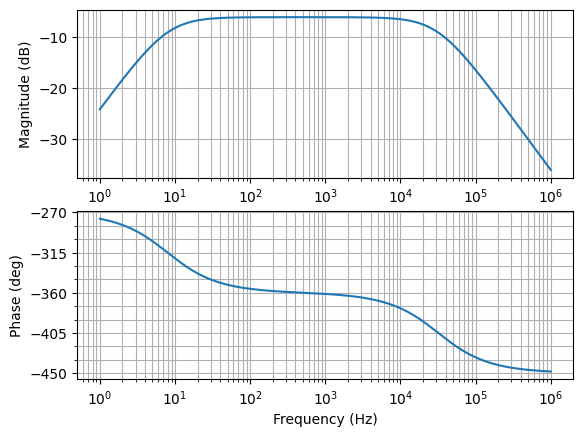

In [29]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Inputs
R5 = 10000
RV = 10000
C5 = 1e-9
C4 = 1e-6

# Compute transfer function parameter
A = RV/(R5+RV)
sys = A * ct.tf([(R5+RV)*C4, 0.], [R5*RV*C5*C4, (RV*C5+RV*C4+R5*C4), 1.])

# Print transfer function parameter
print("A : ", A)
print(sys)

# Display bode diagram
fig = plt.figure()
out = ct.bode_plot(sys, deg=True, dB=True, Hz=True)
plt.show()

-----------------------------------------------
Transfer function With RV = 1000.0
-----------------------------------------------
A_RV :  0.5
A_out :  0.05
w0 :  200000.0 rad/s
f0 :  31830.98861837907 Hz
w1 :  50.0 rad/s
f1 :  7.957747154594767 Hz

         0.001 s
-------------------------
1e-07 s^2 + 0.02001 s + 1

-----------------------------------------------
Transfer function With RV = 5000.0
-----------------------------------------------
A_RV :  0.5
A_out :  0.25
w0 :  200000.0 rad/s
f0 :  31830.98861837907 Hz
w1 :  50.0 rad/s
f1 :  7.957747154594767 Hz

         0.005 s
-------------------------
1e-07 s^2 + 0.02001 s + 1

-----------------------------------------------
Transfer function With RV = 7500.0
-----------------------------------------------
A_RV :  0.5
A_out :  0.375
w0 :  200000.0 rad/s
f0 :  31830.98861837907 Hz
w1 :  50.0 rad/s
f1 :  7.957747154594767 Hz

        0.0075 s
-------------------------
1e-07 s^2 + 0.02001 s + 1

---------------------------------------

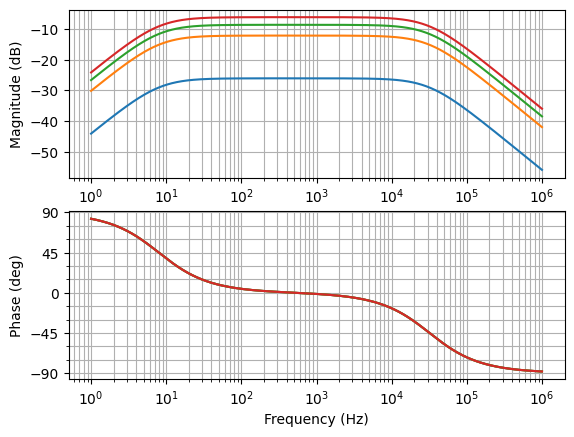

In [36]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Inputs
R5 = 10000
RV = 10000
C5 = 1e-9
C4 = 1e-6

sys_array = []
for alpha in [0.1, 0.5, 0.75, 1.0]:
    # Compute transfer function parameter
    A = RV/(R5+RV)
    w0 = (R5+RV)/(R5*RV*C5)
    w1 = 1/((R5+RV)*C4)
    sys = alpha * A * ct.tf([1.], [1./w0, 1.]) \
            * ct.tf([1./w1, 0.], [1./w1, 1.])
    sys_array.append(sys)

    # Print transfer function parameter
    print("-----------------------------------------------")
    print("Transfer function With RV = " + str(alpha*RV))
    print("-----------------------------------------------")
    print("A_RV : ", A)
    print("A_out : ", A*alpha)
    print("w0 : ", w0, "rad/s")
    print("f0 : ", w0/(2*np.pi), "Hz")
    print("w1 : ", w1, "rad/s")
    print("f1 : ", w1/(2*np.pi), "Hz")
    print(sys)

# Display bode diagram
fig = plt.figure()
out = ct.bode_plot(sys_array, initial_phase=0.0, deg=True, dB=True, Hz=True)
plt.show()